# Oligopoly
"a state of limited competition, in which a market is shared by a small number of producers or sellers."


# Table of Content
1. List of different sectors where oligopoly can be seen in action
2. Major competitors within each sector
3. Summary on pros and cons of oligopoly

# 1. *Oligopoly Sectors*
   - Beverages 
   - Technogoly 
   - Pharmaceutical
   - Sports
   - Music Industry


Within each of these sectors we can see **oligopoly** have an effect on how that sector is ran and controlled. Throughout this notebook I will display different statical facts through visual graphs to amplify the effects this kind of market structure has on each sector. Towards the end of this notebook I will present some information on how this kind of market strucutre reflects human nature at its core. I hope you enjoy!

Each sector will display anaual income of each company and number of employees (for now).

# USEFUL CODE:

In [7]:
nfl_teams = [
    "Arizona Cardinals",
    "Atlanta Falcons",
    "Baltimore Ravens",
    "Buffalo Bills",
    "Carolina Panthers",
    "Chicago Bears",
    "Cincinnati Bengals",
    "Cleveland Browns",
    "Dallas Cowboys",
    "Denver Broncos",
    "Detroit Lions",
    "Green Bay Packers",
    "Houston Texans",
    "Indianapolis Colts",
    "Jacksonville Jaguars",
    "Kansas City Chiefs",
    "Las Vegas Raiders",
    "Los Angeles Chargers",
    "Los Angeles Rams",
    "Miami Dolphins",
    "Minnesota Vikings",
    "New England Patriots",
    "New Orleans Saints",
    "New York Giants",
    "New York Jets",
    "Philadelphia Eagles",
    "Pittsburgh Steelers",
    "San Francisco 49ers",
    "Seattle Seahawks",
    "Tampa Bay Buccaneers",
    "Tennessee Titans",
    "Washington Redskins"
]

In [2]:
import pandas as pd
df = pd.read_csv("Fortune 1000 Companies by Revenue.csv") 
df2 = pd.read_csv("superbowl.csv") 

In [3]:
def totalRev(companyList):
    companies = df[df["name "].isin(companyList)]
    totalRevenue = []
    #Cleaning data
    for i in range(len(companyList)):
        rev = companies.iloc[i].iloc[2]
        if('.' in rev):
            rev = rev[:rev.find('.')]
            totalRevenue.append(int(rev.strip("$ ").replace(",","")))
        else:
            totalRevenue.append(int(rev.strip("$ ").replace(",","")))
   
    return(np.array(totalRevenue))
def nflScape(teams):
    won = []
    lost = []
    appeared = []
    for team in teams:
        wins = df2["Winner"].str.count(team).sum()
        loses = df2["Loser"].str.count(team).sum()
        won.append(wins)
        lost.append(loses)
        appeared.append(wins+loses)
    won = np.array(won)
    lost = np.array(lost)
    appeared = np.array(appeared)
    return won, lost, appeared
    

## Annual Total Revenue From U.S Top Beverage Companies
- Pepsi
- Coca-Cola
- Starbucks
- Keurig Dr Pepper



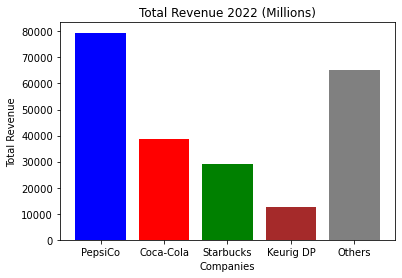

In [4]:
import numpy as np 
from matplotlib import pyplot as plt 

companies = np.array(["PepsiCo","Coca-Cola","Starbucks","Keurig Dr Pepper"])


names = np.array(["PepsiCo", "Coca-Cola", "Starbucks", "Keurig DP", "Others"])
tr = totalRev(companies)
others = 225000 - sum(tr)
tr = np.append(tr,others)
plt.title("Total Revenue 2022 (Millions)") 
plt.xlabel("Companies") 
plt.ylabel("Total Revenue") 
plt.bar(names, tr, color=['Blue','Red','Green',"brown","grey"]) 
plt.show()

# These 4 companies account for about 70% of all of U.S. beverage revenue

According to [Zippa](https://www.zippia.com/advice/us-beverage-industry-statistics/#:~:text=As%20of%202022%2C%20the%20U.S.,of%20more%20than%20%24225%20billion), the U.S. beverage industry has generated an annual revenue of about \\$225 billion. These 4 companies' total combined revenue for 2022 adds up to about \\$160 billion. 

## Annual Total Revenue From U.S Top Technology Companies
- Amazon
- Apple
- Alphabet (Google)
- Meta (Facebook)
- Microsoft

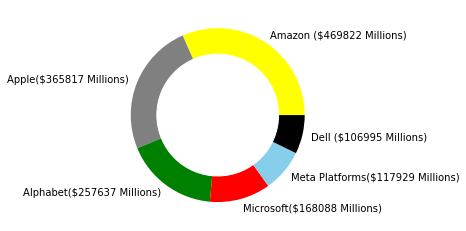

In [5]:
companies = np.array(["Amazon", "Apple", "Alphabet", "Microsoft", "Meta Platforms","Dell Technologies"])


names = np.array(["Amazon", "Apple", "Alphabet", "Microsoft", "Meta Platforms", "Dell"])
tr = totalRev(companies)
names = ["Amazon (${} Millions)".format(tr[0]), "Apple(${} Millions)".format(tr[1]), "Alphabet(${} Millions)".format(tr[2]), 
         "Microsoft(${} Millions)".format(tr[3]), "Meta Platforms(${} Millions)".format(tr[4]), "Dell (${} Millions)".format(tr[5])]
size = tr
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['yellow','grey','green','red','skyblue', 'black'])
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

# Top 6 U.S. Technology Companies

As we can see from this donut chart the big leaders are Amazon, Apple, and Alphabet. These companies are not only the top tier tech companies, but are probably the most advance and largest companies we've seen in human history.

## Annual Total Revenue From U.S Top Pharmaceutical Companies
- Johnson & Johnson
- Pfizer
- AbbVie
- Merck


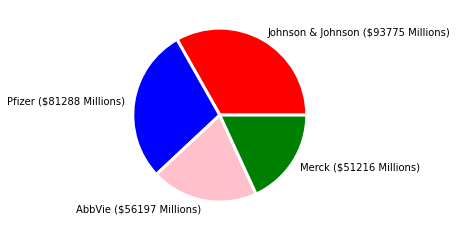

In [6]:
companies = np.array(["Johnson & Johnson", "Pfizer", "AbbVie", "Merck"])


names = np.array(["Johnson & Johnson", "Pfizer", "AbbVie", "Merck"])
tr = totalRev(companies)
names = ["Johnson & Johnson (${} Millions)".format(tr[0]), "Pfizer (${} Millions)".format(tr[1]), 
         "AbbVie (${} Millions)".format(tr[2]), "Merck (${} Millions)".format(tr[3])]
size = tr
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','blue','pink','green'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

# Show the graph
plt.show()

# Top Pharmaceutical Companies
* It was difficult to provide total pharmaceutical revenue, but these are some of the leading companies in the industry. Some of which came out with Covid19 Vaccines.

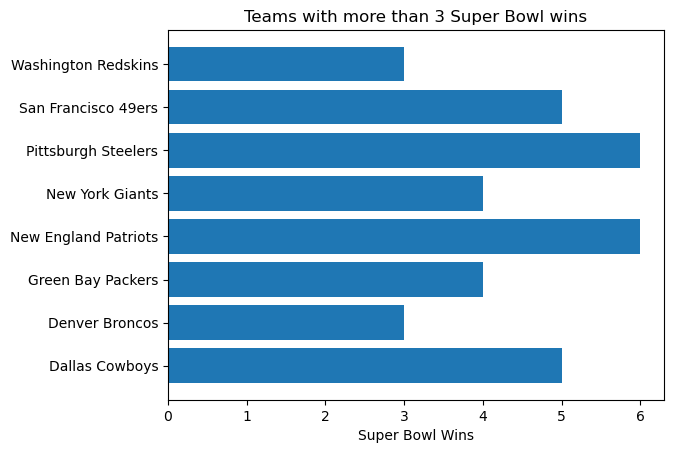

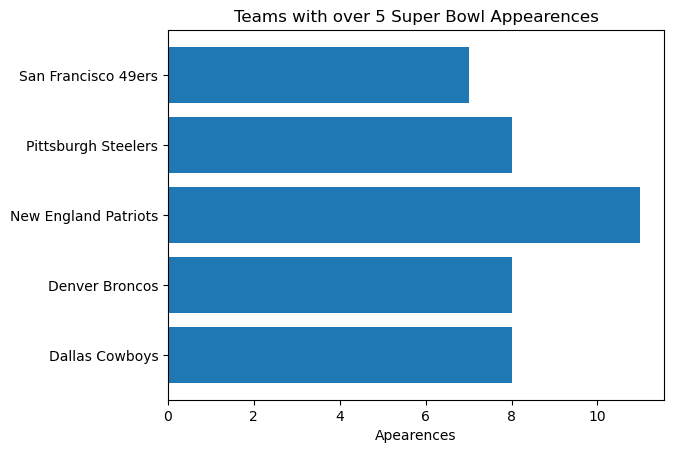

In [21]:
teams = np.array(nfl_teams)
won, lost, appeared = nflScape(teams)
threePlus = np.where(won >=3)[0]
eightAppeared =  np.where(appeared > 5)[0]
topWinners = []
appearedTeams = []

wins = []
loses = []
appearence = []
# Teams with 3 plus wins
for i in threePlus: 
    topWinners.append(teams[i])
    wins.append(won[i])
    loses.append(lost[i])
for i in eightAppeared: 
    appearedTeams.append(teams[i])
    appearence.append(appeared[i])
wins = np.array(wins)
topWinners = np.array(topWinners)
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(topWinners, wins,align='center')
ax.set_xlabel('Super Bowl Wins')
ax.set_title('Teams with more than 3 Super Bowl wins')


fig1, ax1 = plt.subplots()
ax1.barh(appearedTeams, appearence,align='center')
ax1.set_xlabel('Apearences')
ax1.set_title('Teams with over 5 Super Bowl Appearences')
plt.show()



# These 5 teams (out of 32 teams)  accounted for 77% of all Super Bowl apearances

* This dataset recorded up to Super Bowl LIV (54).

# Helpful Links:
   [Kaggle](https://www.kaggle.com/)
   
   [Matplotlib](https://matplotlib.org/)


In [47]:
def totalRevenue(companies):
    import requests
    apiKey = 'YIW8P5AZW4J16Y0R'
    tr = []
    for company in companies:
        url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={}&dataset=csv&apikey={}'.format(company,apiKey)
        r = requests.get(url)
        data = r.json()
        revenue2022 = int(data["annualReports"][0]["totalRevenue"])
        tr.append(revenue2022)
    return np.array(tr)